In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.models import Model

In [2]:
# Local system root directory (adjust the path if your dataset is in a different folder)
root = './real-vs-fake'

train_dir = './real-vs-fake/train'
val_dir = './real-vs-fake/valid'
test_dir = './real-vs-fake/test'


In [3]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


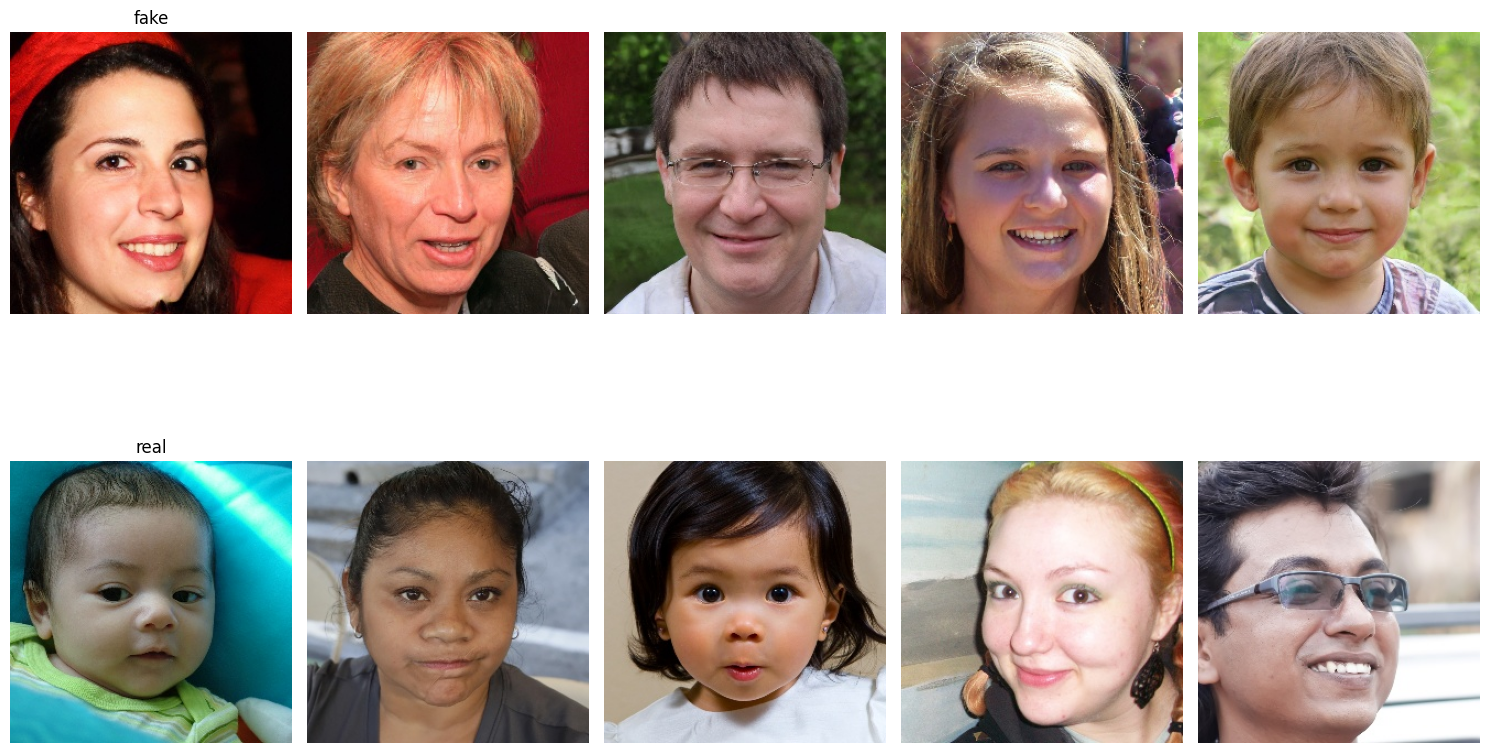

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define class names
class_names = ['fake', 'real']
num_images = 5

plt.figure(figsize=(15, 10))

# Plot sample images from training directory
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(train_dir, class_name)
    images = os.listdir(class_dir)
    
    # Plot title for the class
    plt.subplot(len(class_names), num_images, i * num_images + 1)
    plt.title(class_name)
    plt.axis('off')
    
    # Plot sample images
    for j in range(num_images):
        img_path = os.path.join(class_dir, images[j])
        img = mpimg.imread(img_path)
        plt.subplot(len(class_names), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)
target_size = (256,256)
batch_size = 32  # Update this according to your batch size

# Load data from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)


test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Ensure test data is not shuffled
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [6]:
# Verify class distribution
print("Training class distribution:", train_generator.class_indices)
print("Validation class distribution:", val_generator.class_indices)

Training class distribution: {'fake': 0, 'real': 1}
Validation class distribution: {'fake': 0, 'real': 1}


In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(256, activation='relu'),
    #Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\LEGION\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
 
 
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint]
)

print("✅ Models saved in /kaggle/working/saved_models/")

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 772ms/step - accuracy: 0.7049 - loss: 0.5495
Epoch 1: saving model to /kaggle/working/saved_models/model_epoch_01.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2658s 851ms/step - accuracy: 0.7050 - loss: 0.5494 - val_accuracy: 0.8686 - val_loss: 0.3053
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.9097 - loss: 0.2247
Epoch 2: saving model to /kaggle/working/saved_models/model_epoch_02.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2002s 641ms/step - accuracy: 0.9097 - loss: 0.2247 - val_accuracy: 0.9228 - val_loss: 0.1946
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.9629 - loss: 0.0985
Epoch 3: saving model to /kaggle/working/saved_models/model_epoch_03.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 2024s 648ms/step - accuracy: 0.9629 - loss: 0.0985 - val_accuracy: 0.9479 - val_loss: 0.1459
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 675ms/step - accuracy: 0.9825 - loss: 0.0481
Epoch 4: saving model to /kaggle/working/sa

In [11]:
test_metrics = model.evaluate(test_generator)
print("Test metrics:", test_metrics[1])

625/625 ━━━━━━━━━━━━━━━━━━━━ 406s 650ms/step - accuracy: 0.9430 - loss: 0.3295
Test metrics: 0.943149983882904


In [3]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained and compiled model
model.save('my_model.h5')  # Saves architecture + weights + optimizer state

# Optional: Verify it saved correctly
try:
    saved_model = load_model('my_model.h5')
    print("✅ Model saved successfully as 'my_model.h5'")
    print("Model Summary:")
    saved_model.summary()
except:
    print("❌ Error saving model")

NameError: name 'model' is not defined

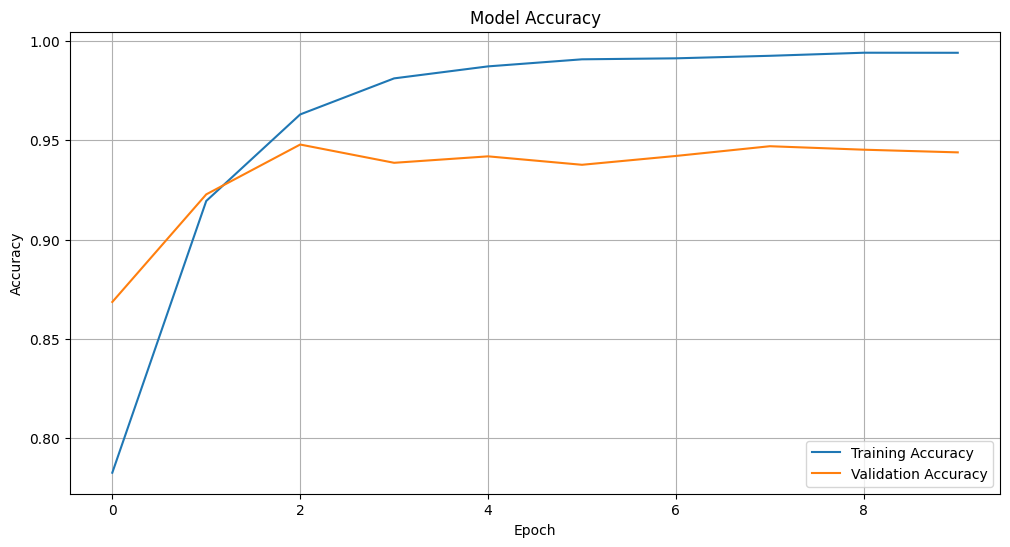

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

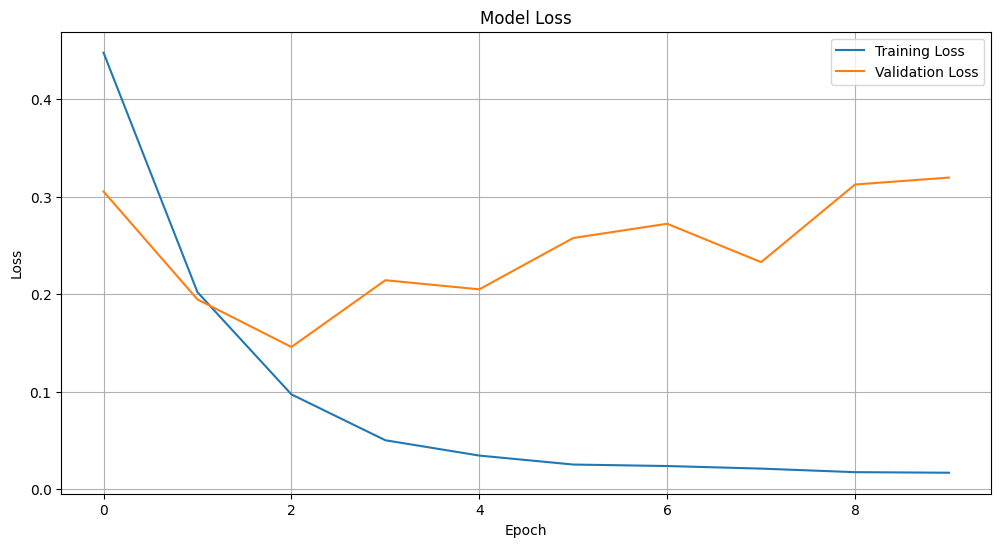

In [13]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [14]:
# Generate predictions on the test set
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)

# The model output is the probability of the image being real
# Convert probabilities to percentage
predicted_percentages = predictions * 100

# Convert to predicted classes with a threshold of 50%
predicted_classes = np.where(predicted_percentages > 50, 1, 0)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

625/625 ━━━━━━━━━━━━━━━━━━━━ 169s 270ms/step
              precision    recall  f1-score   support

        fake       0.94      0.94      0.94     10000
        real       0.94      0.94      0.94     10000

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000



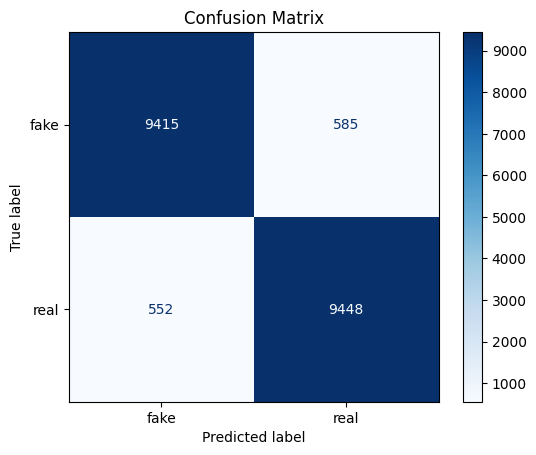

In [15]:
# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Assuming your model is named 'model'
model.save('deepfake_3_model.keras')


In [4]:
from tensorflow.keras.models import load_model
model = load_model('deepfake_3_model.keras')
print("Model Loaded Successfully")

Model Loaded Successfully


In [ ]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained and compiled model
model.save('my_model.h5')  # Saves architecture + weights + optimizer state

# Optional: Verify it saved correctly
try:
    saved_model = load_model('my_model.h5')
    print("✅ Model saved successfully as 'my_model.h5'")
    print("Model Summary:")
    saved_model.summary()
except:
    print("❌ Error saving model")   

✅ Model saved successfully as 'my_model.h5'
Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,584,963 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


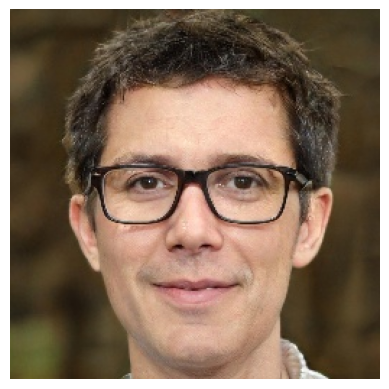

The model predicts this image is 'real' with a confidence of 0.00%.
The model predicts this image is 'fake' with a confidence of 100.00%.


In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert image to array
    img_array = image.img_to_array(img)
    
    # Rescale the image
    img_array = img_array / 255.0
    
    # Expand dimensions to match the input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    return img, img_array

# Provide the path to your image
img_path = 'real-vs-fake/train/fake/0AAY6DBXJA.jpg'
target_size = (256, 256)  # Make sure this matches your model's input size

# Load and preprocess the image
img, img_array = load_and_preprocess_image(img_path, target_size)

# Make a prediction
prediction = model.predict(img_array)

# Get the percentage for both classes
real_confidence = prediction[0][0] * 100
fake_confidence = (1 - prediction[0][0]) * 100

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print the results
print(f"The model predicts this image is 'real' with a confidence of {real_confidence:.2f}%.")
print(f"The model predicts this image is 'fake' with a confidence of {fake_confidence:.2f}%.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import easygui
import os
import sys

# 1. Configure matplotlib backend FIRST
plt.switch_backend('TkAgg')  # Critical for dialog to appear

# 2. Load model with absolute path
MODEL_PATH = os.path.abspath('my_model.h5')  # ← MUST CHANGE TO YOUR ACTUAL PATH
if not os.path.exists(MODEL_PATH):
    print(f"❌ Error: Model not found at {MODEL_PATH}")
    sys.exit(1)

model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

# 3. Image processing
def predict_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(256, 256))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array, verbose=0)[0][0]
        return {
            'real': float(pred) * 100,
            'fake': (1 - float(pred)) * 100,
            'image': img
        }
    except Exception as e:
        print(f"❌ Error processing image: {e}")
        return None

# 4. Main function with guaranteed dialog
def main():
    print("\n🖼️ The file dialog should appear NOW...")
    while True:
        img_path = easygui.fileopenbox(
            title="SELECT IMAGE",
            filetypes=[["*.jpg", "*.jpeg", "*.png", "Image files"]],
            default=os.getcwd()
        )
        
        if not img_path:
            print("👋 No image selected. Exiting...")
            break
            
        results = predict_image(img_path)
        if not results:
            continue
            
        print(f"\n🔍 Results for {os.path.basename(img_path)}:")
        print(f"REAL: {results['real']:.2f}%")
        print(f"FAKE: {results['fake']:.2f}%")
        
        plt.figure(figsize=(8, 6))
        plt.imshow(results['image'])
        plt.title(f"REAL: {results['real']:.2f}% | FAKE: {results['fake']:.2f}%")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()

✅ Model loaded successfully!

🖼️ The file dialog should appear NOW...


## DenseNet121 PRE TRAINED MODEL 

In [1]:
from tensorflow.keras.models import load_model
model = load_model('deepfake_3_model.keras')
print("Model Loaded Successfully")


Model Loaded Successfully


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
from tkinter import Tk, filedialog

# ✅ Your model is already loaded as 'model'

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# Function to manually select image and predict
def upload_and_predict():
    Tk().withdraw()  # Hide the Tkinter root window
    img_path = filedialog.askopenfilename(title="Select an image")
    
    if not img_path:
        print("No image selected. Exiting prediction.\n")
        return
    
    img, img_array = load_and_preprocess_image(img_path)
    
    # Predict
    prediction = model.predict(img_array)
    real_confidence = prediction[0][0] * 100
    fake_confidence = (1 - prediction[0][0]) * 100

    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Print result
    print(f"The model predicts this image is 'real' with a confidence of {real_confidence:.2f}%.")
    print(f"The model predicts this image is 'fake' with a confidence of {fake_confidence:.2f}%.\n")

# 🔥 Run prediction once
upload_and_predict()


In [1]:
base_model = DenseNet121(weights='imagenet',include_top=False,input_shape=(256,256,3))

NameError: name 'DenseNet121' is not defined

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    
model2.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history2 = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

In [ ]:
test_metrics2 = model2.evaluate(test_generator)
print("Test metrics:", test_metrics2[1])

In [ ]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
# Generate predictions on the test set
test_generator.reset()
predictions = model2.predict(test_generator, verbose=1)

# The model output is the probability of the image being real
# Convert probabilities to percentage
predicted_percentages = predictions * 100

# Convert to predicted classes with a threshold of 50%
predicted_classes = np.where(predicted_percentages > 50, 1, 0)

# Get true labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print the classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

In [ ]:
# 3. Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# 4. Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    
    # Convert image to array
    img_array = image.img_to_array(img)
    
    # Rescale the image
    img_array = img_array / 255.0
    
    # Expand dimensions to match the input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    return img, img_array

# Provide the path to your image
img_path = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/fake/01050DBM3C.jpg'
target_size = (256, 256)  # Make sure this matches your model's input size

# Load and preprocess the image
img, img_array = load_and_preprocess_image(img_path, target_size)

# Make a prediction
prediction = model2.predict(img_array)

# Get the percentage for both classes
real_confidence = prediction[0][0] * 100
fake_confidence = (1 - prediction[0][0]) * 100

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Print the results
print(f"The model predicts this image is 'real' with a confidence of {real_confidence:.2f}%.")
print(f"The model predicts this image is 'fake' with a confidence of {fake_confidence:.2f}%.")